In [5]:
import helper_functions as hf
import matplotlib.pyplot as plt

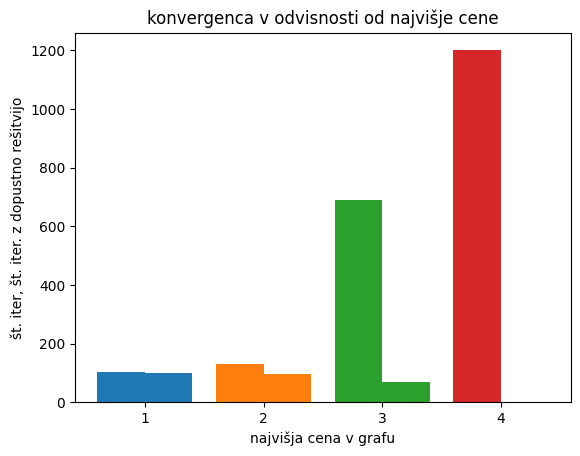

In [2]:


import matplotlib.pyplot as plt

data = [[104, 101], [132, 97], [689, 70], [1200, 0]]
labels = [1,2,3,4]

fig, ax = plt.subplots()
width = 0.4  # Širina vsakega stolpca

for i, (bar_data, label) in enumerate(zip(data, labels)):
    x = [i - width/2, i + width/2]  # X-koordinate stolpcev
    ax.bar(x, bar_data, width=width, label=label)

ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels)
ax.set_xlabel('najvišja cena v grafu')
ax.set_ylabel('št. iter, št. iter. z dopustno rešitvijo')
ax.set_title('konvergenca v odvisnosti od najvišje cene')
# ax.legend()

plt.show()

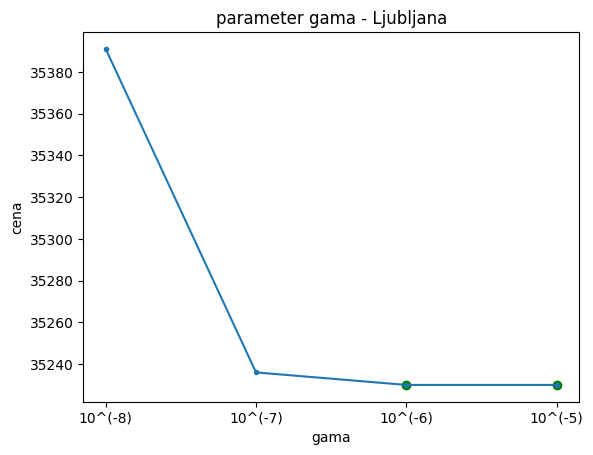

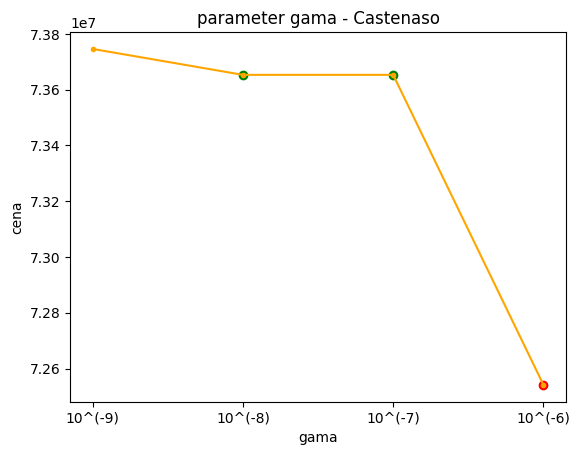

In [19]:
import matplotlib.pyplot as plt
x = ["10^(-9)", "10^(-8)", "10^(-7)", "10^(-6)", "10^(-5)"]
y_lj = [None,35_391,35_236,35_230,35_230]
y_cas = [73_746_113 ,73_653_153 , 73_653_153, 72_541_310, None]

plt.title("parameter gama - Ljubljana")
plt.xlabel("gama")
plt.ylabel("cena")
plt.plot(x,y_lj,marker='.')
plt.scatter(x[3:],y_lj[3:], marker="o", color="green")

plt.show()
plt.title("parameter gama - Castenaso")
plt.xlabel("gama")
plt.ylabel("cena")
plt.plot(x,y_cas,marker='.',color="orange")
plt.scatter(x[1:3],y_cas[1:3], marker="o", color="green")
plt.scatter(x[3],y_cas[3], marker="o", color="red")


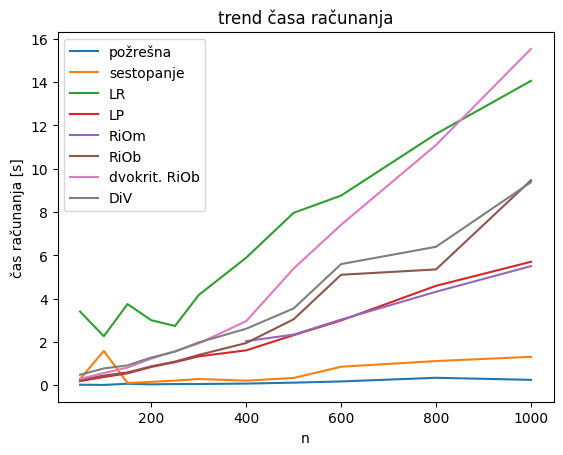

Text(0, 0.5, 'gostota')

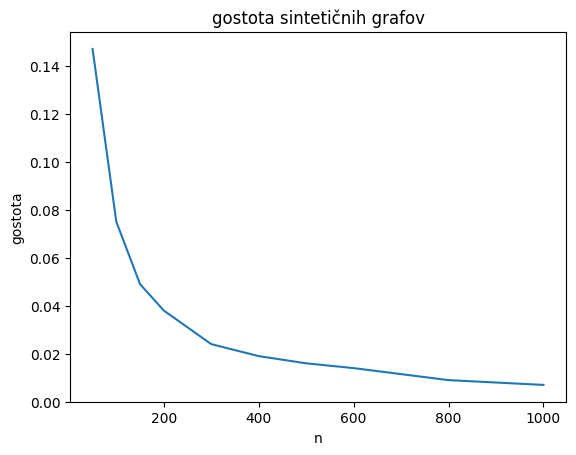

In [5]:

import matplotlib.pyplot as plt
x = [50,100,150,200,250,300,400,500,600,800,1000]
poz = [0.019, 0.01, 0.065, 0.036,0.051,0.052,0.072,0.116,0.171,0.34,0.245]
plt.plot(x,poz,label="požrešna")
sest = [0.275, 1.583, 0.098, 0.153,0.208,0.284,0.207,0.331,0.851,1.113,1.308]
plt.plot(x,sest,label="sestopanje")

lr = [3.401, 2.261, 3.746,3.000,2.734,4.165,5.889,7.963,8.761,11.61,14.063]
plt.plot(x,lr,label="LR")
lp = [0.185, 0.375, 0.546, 0.842,1.061,1.33,1.608,2.312,2.99,4.591,5.7]
plt.plot(x,lp,label="LP")

# x = [50,100,150,200,        250,300,400,500,600,800,1000]
riom = [None,None,0.724,None,1.11,None,2.033,2.336,3.03,4.317,5.5]
plt.plot(x,riom,label="RiOm")
riob = [0.244, 0.441, 0.589,0.869,1.089,1.395,1.946,3.044,5.101,5.348,9.467]
plt.plot(x,riob,label="RiOb")

biobj = [0.289, 0.56, 0.812, 1.227,1.566,1.929,2.957,5.389,7.409,11.099,15.538]
plt.plot(x,biobj, label="dvokrit. RiOb")
# biobjLP = [0.185, 0.407, 0.569, 0.852,1.112,1.461,1.711,2.407,2.984,4.81,5.687]
# plt.plot(x,biobjLP, label="dvokrit. LP")
div = [0.479, 0.772, 0.913, 1.275,1.551,1.975,2.606,3.546,5.595,6.394,9.379]
plt.plot(x,div,label="DiV")
plt.xlabel("n")
plt.ylabel("čas računanja [s]")
plt.title("trend časa računanja")

plt.legend()
plt.show()
rho = [0.147,0.075,0.049, 0.038, 0.031, 0.024, 0.019, 0.016, 0.014, 0.009, 0.007]
plt.plot(x,rho)
plt.title("gostota sintetičnih grafov")
plt.xlabel("n")
plt.ylabel("gostota")





In [1]:
import helper_functions as hf
def subang_to_slo(substr):
    for k in hf.ang_to_slo.keys():
        if substr in k:
            return hf.ang_to_slo[k]

              cost           LB  over_cap_count        time  percent_of_min
count   291.000000    79.000000      267.000000  308.000000      287.000000
mean   1581.477663  1634.683544        0.041199    3.160730        1.001317
std     787.586152   781.428402        0.452839    5.652788        0.004437
min     450.000000   450.000000        0.000000    0.005114        1.000000
25%     700.000000  1040.000000        0.000000    0.132754        1.000000
50%    1400.000000  1850.000000        0.000000    0.535285        1.000000
75%    2300.000000  2310.000000        0.000000    1.953676        1.000000
max    3120.000000  3100.000000        7.000000   30.022176        1.033195


(0.0, 26.587232176858823)

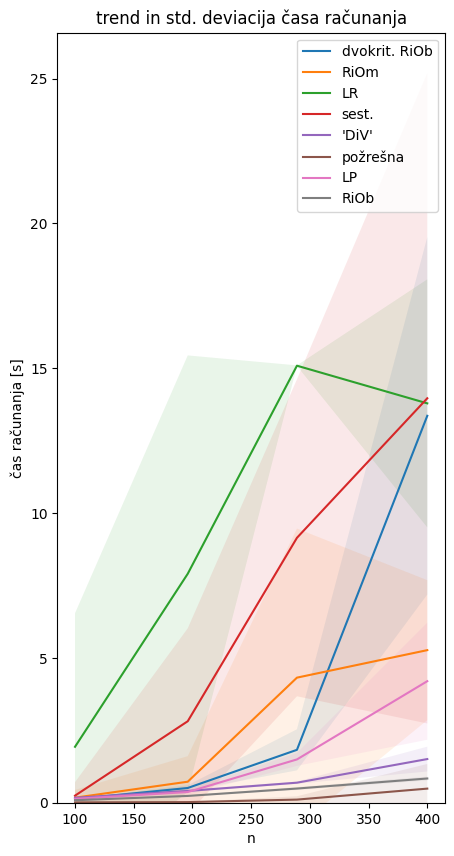

In [7]:
import pandas as pd
import numpy as np

# df = pd.read_json("/home/lema/Documents/diplomska/df29.json")
df = pd.read_json("/home/lema/Documents/diplomska/df71.json")
print(df.describe())
def status_grouper(x):
    counter = [0,0,0,0,0]
    for dicti in x:
        counter[dicti["value"]]+=1
    return counter
        

# df.groupby(["graph_title","demands","solver_name"]).agg({"status": lambda x:status_grouper(x)})
dg = df.groupby(["graph_title","solver_name"]).agg({"cost": "mean","percent_of_min":["mean","std"], "time": ["mean","std"], "status": lambda x:status_grouper(x),"LB":"mean","over_cap_count":"mean"})
dg = dg.reset_index()
# dg[["solver_name","time"]]

plt.figure(figsize=(5,10))

graph_titles = dg["graph_title"].unique()
solvers = dg["solver_name"].unique()
for solver in solvers:
    ns = []
    times = []
    for graph_title in graph_titles:
        sqrtn = int(graph_title.split("_")[1])
        n = sqrtn*sqrtn
        ns.append(n)
        time = dg[(dg["solver_name"] == solver) & (dg["graph_title"] == graph_title)]["time"]
        times.append(time)
    ns_times = sorted(zip(ns, times))
    ns = [n for n, _ in ns_times]
    mean_times = np.array([time["mean"] for _, time in ns_times]).flatten()
    std_times = np.array([time["std"] for _, time in ns_times]).flatten()
    plt.plot(ns,mean_times,label=subang_to_slo(solver))
    plt.fill_between(ns, mean_times-std_times, mean_times+std_times,alpha=0.1, interpolate=True)
plt.legend()
plt.title("trend in std. deviacija časa računanja")
plt.xlabel("n")
plt.ylabel("čas računanja [s]")
plt.ylim(bottom=0)




       graph_title          solver_name    status
0   mrezni_10_10_1            Biobjecti  1.000000
1   mrezni_10_10_1                  BnB  1.000000
2   mrezni_10_10_1                Dai3_  1.000000
3   mrezni_10_10_1              Descent  1.000000
4   mrezni_10_10_1                  DnC  1.000000
5   mrezni_10_10_1  Keep_feasible_shuff  1.000000
6   mrezni_10_10_1        LP_relaxation  0.888889
7   mrezni_10_10_1        Optimal_cvxpy  1.000000
8   mrezni_14_10_1            Biobjecti  1.000000
9   mrezni_14_10_1                  BnB  1.000000
10  mrezni_14_10_1                Dai3_  0.800000
11  mrezni_14_10_1              Descent  1.000000
12  mrezni_14_10_1                  DnC  0.900000
13  mrezni_14_10_1  Keep_feasible_shuff  1.000000
14  mrezni_14_10_1        LP_relaxation  0.700000
15  mrezni_14_10_1        Optimal_cvxpy  1.000000
16  mrezni_17_10_1            Biobjecti  1.000000
17  mrezni_17_10_1                  BnB  1.000000
18  mrezni_17_10_1                Dai3_  0.300000


Text(0.5, 1.0, 'delež optimalnih rešitev')

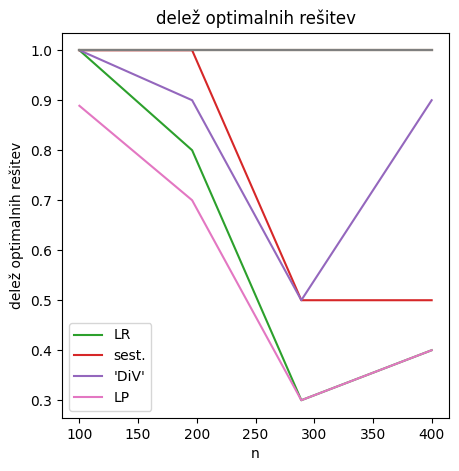

In [22]:

def optimality_rate(x):
    opt = 0
    for dicti in x:
        if dicti["value"] == 1:
            opt+=1
    return opt/len(x)
    

# df.groupby(["graph_title","demands","solver_name"]).agg({"status": lambda x:status_grouper(x)})
dg = df.groupby(["graph_title","solver_name"]).agg({"status": lambda x:optimality_rate(x)})
dg = dg.reset_index()
print(dg)
# dg[["solver_name","time"]]

plt.figure(figsize=(5,5))

graph_titles = dg["graph_title"].unique()
solvers = dg["solver_name"].unique()
for solver in solvers:
    ns = []
    statuses = []
    for graph_title in graph_titles:
        sqrtn = int(graph_title.split("_")[1])
        n = sqrtn*sqrtn
        ns.append(n)
        status = float(dg[(dg["solver_name"] == solver) & (dg["graph_title"] == graph_title)]["status"])
        statuses.append(status)
    ns_statuses = sorted(zip(ns, statuses))
    ns = [n for n, _ in ns_statuses]
    statuses = [status for _, status in ns_statuses]
    if subang_to_slo(solver) in ["sest.", "'DiV'", "LP", "LR"]:
        label = subang_to_slo(solver)
    else:
        label = "_nolegend_"
    plt.plot(ns,statuses,label=label)
plt.legend()
plt.xlabel("n")
plt.ylabel("delež optimalnih rešitev")
plt.title("delež optimalnih rešitev")


